In [3]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.0'

In [4]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [5]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [6]:
if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")

The shapes of our data match !


In [7]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x


In [8]:
# Example usage:
model = Perceptron(2, 1)

In [9]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

In [10]:
num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.3512
Epoch [200/4000], Loss: 0.2536
Epoch [300/4000], Loss: 0.2004
Epoch [400/4000], Loss: 0.1659
Epoch [500/4000], Loss: 0.1416
Epoch [600/4000], Loss: 0.1234
Epoch [700/4000], Loss: 0.1092
Epoch [800/4000], Loss: 0.0979
Epoch [900/4000], Loss: 0.0887
Epoch [1000/4000], Loss: 0.0810
Epoch [1100/4000], Loss: 0.0745
Epoch [1200/4000], Loss: 0.0689
Epoch [1300/4000], Loss: 0.0641
Epoch [1400/4000], Loss: 0.0599
Epoch [1500/4000], Loss: 0.0562
Epoch [1600/4000], Loss: 0.0529
Epoch [1700/4000], Loss: 0.0500
Epoch [1800/4000], Loss: 0.0474
Epoch [1900/4000], Loss: 0.0450
Epoch [2000/4000], Loss: 0.0429
Epoch [2100/4000], Loss: 0.0409
Epoch [2200/4000], Loss: 0.0391
Epoch [2300/4000], Loss: 0.0375
Epoch [2400/4000], Loss: 0.0360
Epoch [2500/4000], Loss: 0.0346
Epoch [2600/4000], Loss: 0.0333
Epoch [2700/4000], Loss: 0.0321
Epoch [2800/4000], Loss: 0.0309
Epoch [2900/4000], Loss: 0.0299
Epoch [3000/4000], Loss: 0.0289
Epoch [3100/4000], Loss: 0.0280
Epoch [3200/4000]

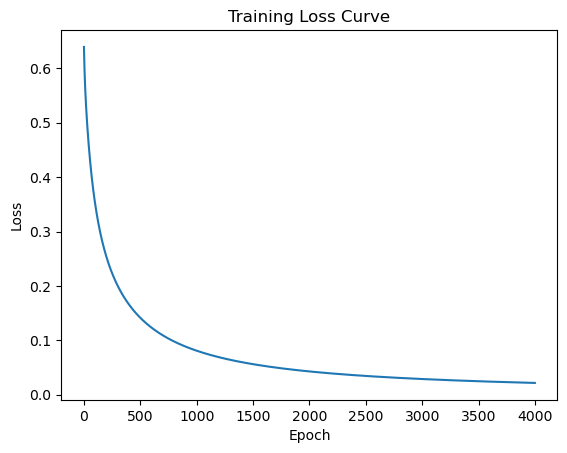

In [11]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()
plot_loss(loss_values)

In [12]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)


tensor([[2.4446e-05],
        [2.5197e-02],
        [2.5197e-02],
        [9.6470e-01]], grad_fn=<SigmoidBackward0>)


In [13]:
output = (test_output > 0.5).float()
print(output)

tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [14]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_perceptron.pth


In [15]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [16]:
from sklearn.datasets import make_circles


# Make 2000 samples 
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [17]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [18]:
print(f"Last 5 X features:\n{X[5:]}") #Wink wink numpy slicing
print(f"\Last 5 y labels:\n{y[5:]}")

Last 5 X features:
tensor([[-0.1930,  0.7703],
        [ 1.0001, -0.3373],
        [-0.1127, -0.8118],
        ...,
        [ 0.6222, -0.7182],
        [-0.7904,  0.1368],
        [ 0.5993,  0.5590]])
\Last 5 y labels:
tensor([1., 0., 1.,  ..., 0., 1., 1.])


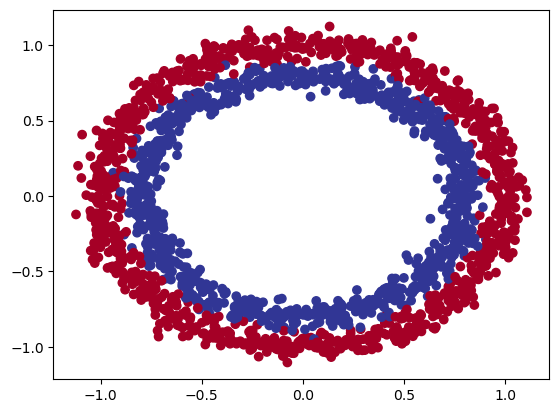

In [19]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [20]:
#Analyse the data: print the shape of our toy dataset
print("Shape of the toy dataset:")
print(f"X shape: {X.shape}, y shape: {y.shape}")
print("\n")

#What's the second dimension on X?
print("Second dimension of X:", X.shape[1])
print("\n")

#Print some values of the toy dataset
print("Some values of the toy dataset:")
print("X:", X[:5])
print("y:", y[:5])


Shape of the toy dataset:
X shape: torch.Size([2000, 2]), y shape: torch.Size([2000])


Second dimension of X: 2


Some values of the toy dataset:
X: tensor([[ 0.4452, -0.5584],
        [-0.6263,  0.8151],
        [-0.4009,  0.7175],
        [ 0.8309, -0.6262],
        [-0.1443,  0.7514]])
y: tensor([1., 0., 1., 0., 1.])


In [21]:
import torch
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible


In [22]:
#Ex 3 Build a model similar to the perceptron with 2 linear layers (no activation function) 
#Please be mindfull of your model names (distinct names) 
#If capable move your model to the gpu

class TwoLayerPerceptron(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TwoLayerPerceptron, self).__init__()
        self.hidden_layer = torch.nn.Linear(input_dim, hidden_dim)  
        self.output_layer = torch.nn.Linear(hidden_dim, output_dim) 
        
    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.output_layer(x)
        return x

twoLayerModel = TwoLayerPerceptron(input_dim=2, hidden_dim=3, output_dim=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

twoLayerModel.to(device)


TwoLayerPerceptron(
  (hidden_layer): Linear(in_features=2, out_features=3, bias=True)
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

In [23]:
# Ex 4 Create the recommended loss_fn and optimizer
import torch.optim as optim

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = optim.SGD(twoLayerModel.parameters(), lr=0.01) 


Epoch [10/2000], Loss: 0.7163, Accuracy: 0.5150
Epoch [20/2000], Loss: 0.7154, Accuracy: 0.5125
Epoch [30/2000], Loss: 0.7146, Accuracy: 0.5125
Epoch [40/2000], Loss: 0.7139, Accuracy: 0.5106
Epoch [50/2000], Loss: 0.7131, Accuracy: 0.5100
Epoch [60/2000], Loss: 0.7125, Accuracy: 0.5100
Epoch [70/2000], Loss: 0.7118, Accuracy: 0.5094
Epoch [80/2000], Loss: 0.7112, Accuracy: 0.5075
Epoch [90/2000], Loss: 0.7107, Accuracy: 0.5081
Epoch [100/2000], Loss: 0.7101, Accuracy: 0.5094
Epoch [110/2000], Loss: 0.7096, Accuracy: 0.5094
Epoch [120/2000], Loss: 0.7091, Accuracy: 0.5081
Epoch [130/2000], Loss: 0.7087, Accuracy: 0.5088
Epoch [140/2000], Loss: 0.7083, Accuracy: 0.5088
Epoch [150/2000], Loss: 0.7078, Accuracy: 0.5081
Epoch [160/2000], Loss: 0.7075, Accuracy: 0.5075
Epoch [170/2000], Loss: 0.7071, Accuracy: 0.5069
Epoch [180/2000], Loss: 0.7067, Accuracy: 0.5062
Epoch [190/2000], Loss: 0.7064, Accuracy: 0.5062
Epoch [200/2000], Loss: 0.7061, Accuracy: 0.5075
Epoch [210/2000], Loss: 0.705

<Figure size 1000x500 with 0 Axes>

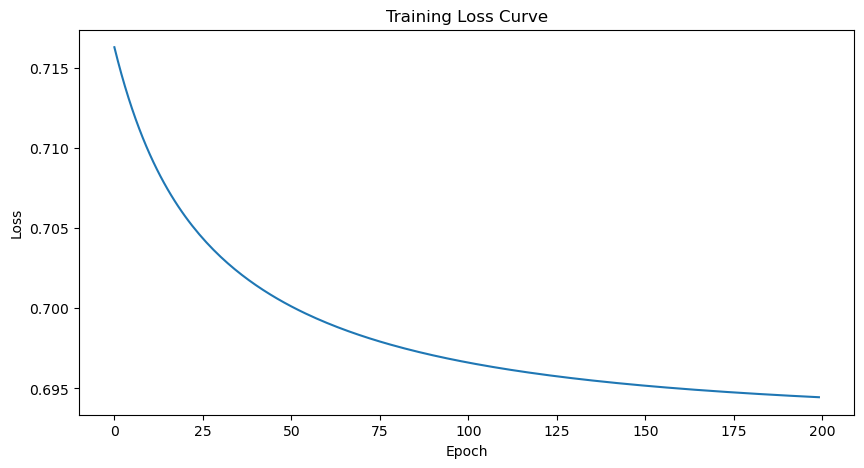

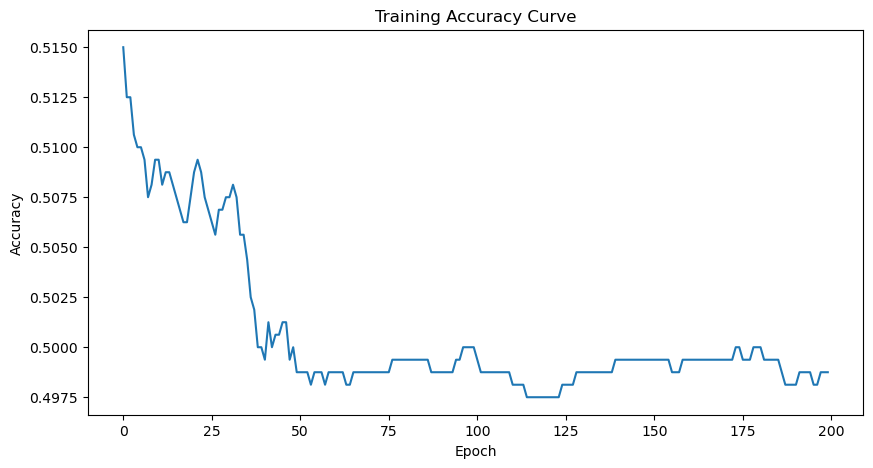

In [24]:
# Ex 5 Build the training loop
# Every 10 epochs rint the loss and the accuracy and save them in a loss_curve, acc_curve
# Also plot them
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


num_epochs = 2000
loss_curve = []
acc_curve = []

for epoch in range(num_epochs):
    outputs = twoLayerModel(X_train)
    loss = loss_fn(outputs, y_train.unsqueeze(-1)) 
    predictions = torch.round(torch.sigmoid(outputs))
    correct = (predictions == y_train.unsqueeze(-1)).sum().item()
    accuracy = correct / len(y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')
        loss_curve.append(loss.item())
        acc_curve.append(accuracy)

plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(acc_curve)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.show()



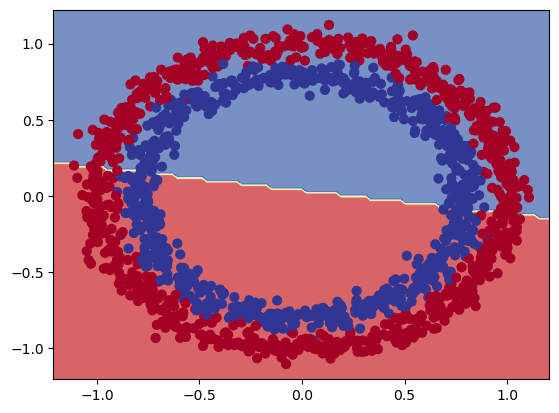

In [25]:
# 3 Evaluate Model
from utils import plot_decision_boundary
plot_decision_boundary(twoLayerModel, X_train, y_train)


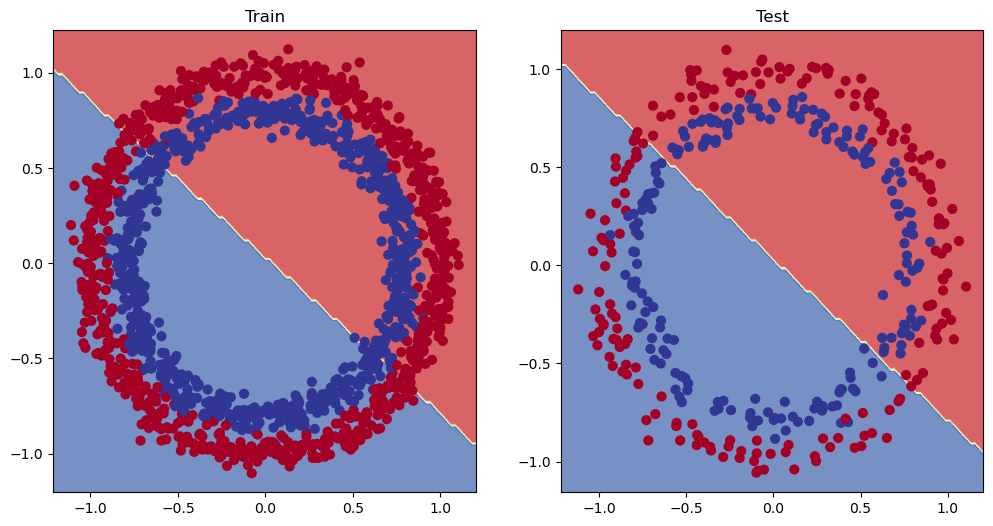

In [26]:
# Plot decision boundaries for training and test sets
model_circle = nn.Sequential(
     nn.Linear(in_features=2, out_features=5),
     nn.Linear(in_features=5, out_features=1)
 ).to(device)

model_circle
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

In [27]:
# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
input_dummy

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [28]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(input_dummy)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

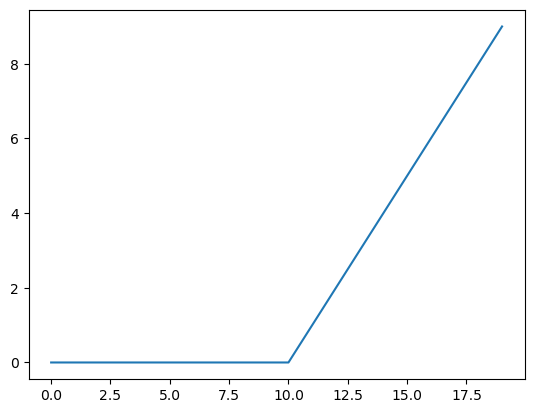

In [29]:
plt.plot(relu(input_dummy))

Epoch [10/10000], Loss: 0.7169, Accuracy: 0.5000
Epoch [20/10000], Loss: 0.7147, Accuracy: 0.5000
Epoch [30/10000], Loss: 0.7128, Accuracy: 0.5000
Epoch [40/10000], Loss: 0.7111, Accuracy: 0.5000
Epoch [50/10000], Loss: 0.7095, Accuracy: 0.5000
Epoch [60/10000], Loss: 0.7081, Accuracy: 0.5000
Epoch [70/10000], Loss: 0.7069, Accuracy: 0.5000
Epoch [80/10000], Loss: 0.7057, Accuracy: 0.5000
Epoch [90/10000], Loss: 0.7047, Accuracy: 0.5000
Epoch [100/10000], Loss: 0.7038, Accuracy: 0.5000
Epoch [110/10000], Loss: 0.7029, Accuracy: 0.5000
Epoch [120/10000], Loss: 0.7022, Accuracy: 0.5000
Epoch [130/10000], Loss: 0.7015, Accuracy: 0.5000
Epoch [140/10000], Loss: 0.7008, Accuracy: 0.5000
Epoch [150/10000], Loss: 0.7003, Accuracy: 0.5000
Epoch [160/10000], Loss: 0.6997, Accuracy: 0.5000
Epoch [170/10000], Loss: 0.6993, Accuracy: 0.5000
Epoch [180/10000], Loss: 0.6988, Accuracy: 0.5000
Epoch [190/10000], Loss: 0.6984, Accuracy: 0.5000
Epoch [200/10000], Loss: 0.6980, Accuracy: 0.5000
Epoch [21

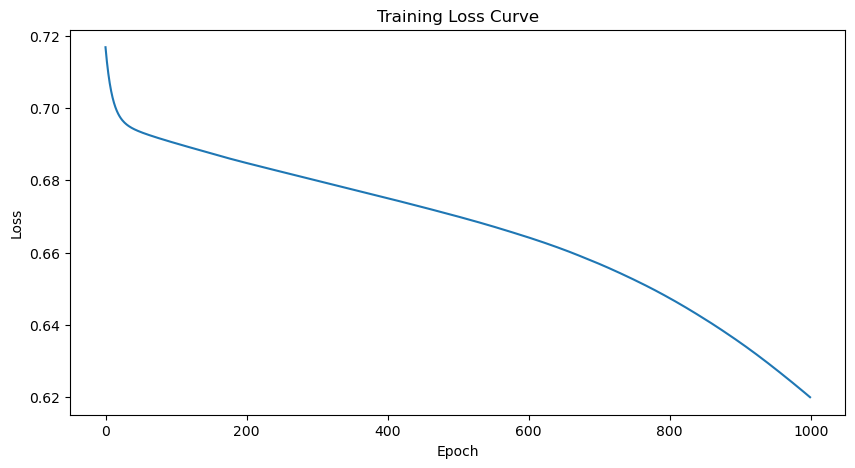

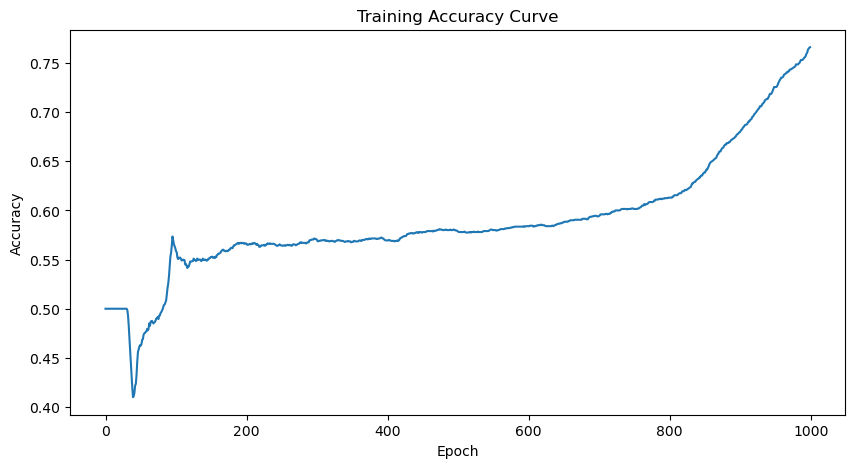

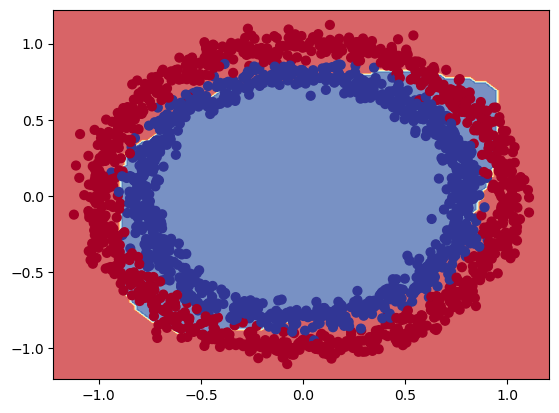

In [38]:
# Ex 6 Recreate the model with some none linear activation functions
# Ex 7 Recreate the optimizer and training loop
# Ex 8 Evaluate vizual
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from utils import plot_decision_boundary

class TwoLayerPerceptron(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TwoLayerPerceptron, self).__init__()
        self.hidden_layer = torch.nn.Linear(input_dim, hidden_dim)  
        self.activation = torch.nn.ReLU()  
        self.output_layer = torch.nn.Linear(hidden_dim, output_dim) 
        
    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.activation(x)  
        x = self.output_layer(x)
        return x

X_train, y_train = make_circles(n_samples=2000, noise=0.05, random_state=42)

X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train, y_train = X_train.to(device), y_train.to(device)

twoLayerModel = TwoLayerPerceptron(input_dim=2, hidden_dim=10, output_dim=1)
twoLayerModel.to(device)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = optim.SGD(twoLayerModel.parameters(), lr=0.01)  

num_epochs = 10000
loss_curve = []
acc_curve = []

for epoch in range(num_epochs):
    outputs = twoLayerModel(X_train)
    loss = loss_fn(outputs, y_train.unsqueeze(-1)) 
    predictions = torch.round(torch.sigmoid(outputs))
    correct = (predictions == y_train.unsqueeze(-1)).sum().item()
    accuracy = correct / len(y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')
        loss_curve.append(loss.item())
        acc_curve.append(accuracy)

plt.figure(figsize=(10, 5))
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(acc_curve)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

plot_decision_boundary(twoLayerModel, X_train, y_train)



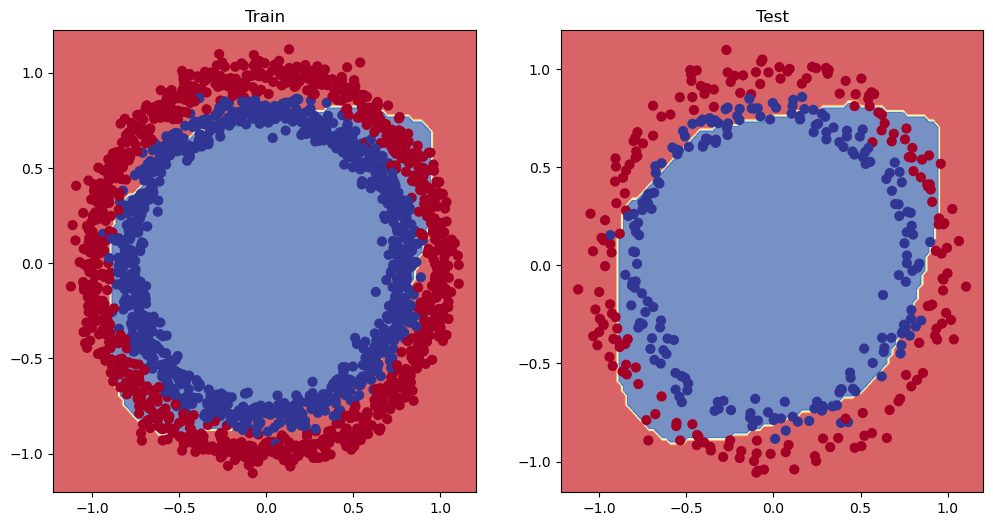

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(twoLayerModel, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(twoLayerModel, X_test, y_test)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


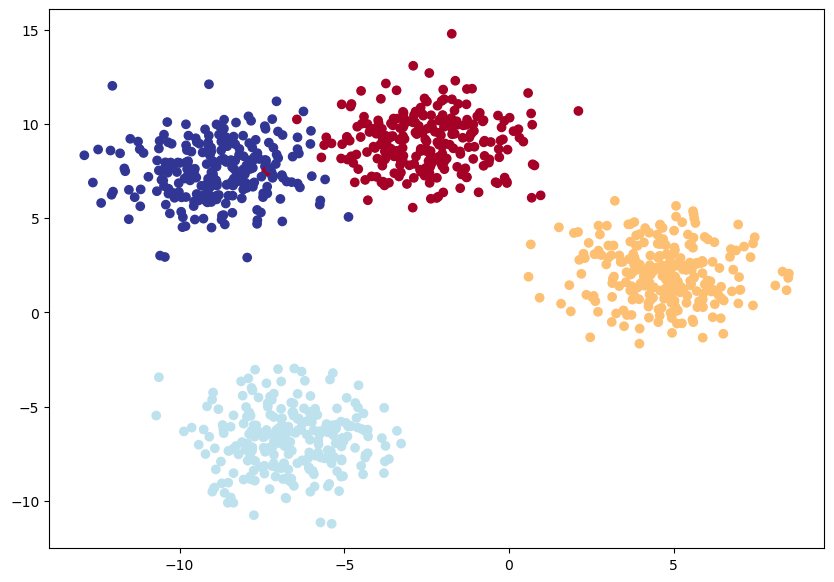

In [32]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

Epoch [100/2000], Loss: 0.1932
Epoch [200/2000], Loss: 0.1377
Epoch [300/2000], Loss: 0.1137
Epoch [400/2000], Loss: 0.0991
Epoch [500/2000], Loss: 0.0892
Epoch [600/2000], Loss: 0.0818
Epoch [700/2000], Loss: 0.0761
Epoch [800/2000], Loss: 0.0716
Epoch [900/2000], Loss: 0.0678
Epoch [1000/2000], Loss: 0.0647
Epoch [1100/2000], Loss: 0.0620
Epoch [1200/2000], Loss: 0.0597
Epoch [1300/2000], Loss: 0.0576
Epoch [1400/2000], Loss: 0.0559
Epoch [1500/2000], Loss: 0.0543
Epoch [1600/2000], Loss: 0.0528
Epoch [1700/2000], Loss: 0.0516
Epoch [1800/2000], Loss: 0.0504
Epoch [1900/2000], Loss: 0.0493
Epoch [2000/2000], Loss: 0.0483


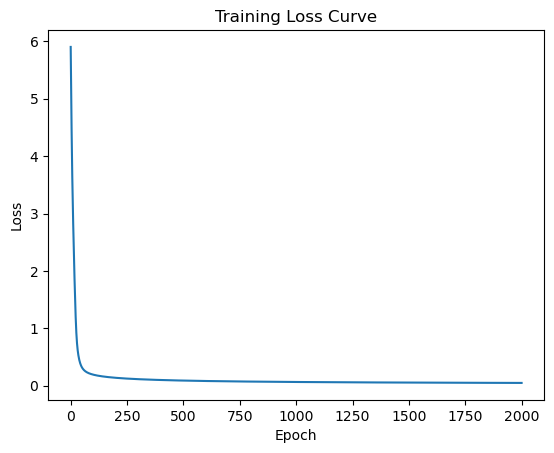

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class MultiClassPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MultiClassPerceptron, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

input_dim = NUM_FEATURES
output_dim = NUM_CLASSES
model = MultiClassPerceptron(input_dim, output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 2000
losses = []

for epoch in range(num_epochs):
    outputs = model(X_blob_train)
    loss = criterion(outputs, y_blob_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
